### SDRs put a lot of work into outbound messaging to capture the attention of prospects. <br> What if they could... Not do that work?

A recent [Dogpatch Advisors](https://www.dogpatchadvisors.com/) [blog post](https://blog.dogpatchadvisors.com/how-to-automate-the-best-sales-prospecting-email-ever-aa6a8c9f532d) explained how their team had deconstructed the "best sales prospecting email ever" - taking a diagram some SDR at Engagio had painstakingly constructed and automating it to work on thousands of prospects across hundreds of companies.

Dogpatch, of course, productized their work and now offers a demo of Custom Images which you can find [here](https://www.dogpatchadvisors.com/product#custom-images).

That does seem like a good idea, but we're cheap. So let's do it ourselves.

### Step one: create an image that makes a compelling opening offer

We're not trying to close the sale with a single touch (though that would be pretty sweet). The goal here is to come up with a hook that would interest our prospect enough to agree to a conversation with our SDR.

Let's start with a relatively simple template (my sales team is insisting that this be mobile-optimized, hence the skyscraper layout):

<img src="image-scaler-demo-placeholder.png" style="max-width: 188px; margin: 0;"/>

Notice the {{company.name}} placeholder. This won't be included in our actual template. Instead we're going to leave it blank so our script can plug in the company's name:

<img src="image-scaler-demo-head.png" style="max-width: 188px; margin: 0;"/>

### Step two: list the companies we want to prospect into

We'll usually want to get this information off a CSV with the pandas `read_csv` function but let's just use a couple of SaaS companies as an example. I'm also going to throw in a domain that I know Clearbit won't return anything for, just so we know that we're handling errors correctly.

In [1]:
import pandas as pd

In [2]:
domains = pd.DataFrame({
    "domain" : ["hubspot.com", "segment.com", "zendesk.com", "crmcorgi.com"]
})

domains

,domain
0,hubspot.com
1,segment.com
2,zendesk.com
3,crmcorgi.com


### Step three: set up directories to keep our images sorted

Come up with a name for our campaign:

In [3]:
CAMPAIGN = "image-scaler-demo"

In [4]:
import os

In [5]:
wk_dir = os.getcwd()

In [6]:
%cd $wk_dir 
%rm -rf campaign-$CAMPAIGN
%mkdir -p campaign-$CAMPAIGN
%cd campaign-$CAMPAIGN
%mkdir previews logos images
%cd $wk_dir 

/Users/ianchan/Code/base-image-scaler
/Users/ianchan/Code/base-image-scaler/campaign-image-scaler-demo
/Users/ianchan/Code/base-image-scaler


In [7]:
cm_dir = wk_dir + "/campaign-" + CAMPAIGN
pr_dir = cm_dir + "/previews/"
lg_dir = cm_dir + "/logos/"
im_dir = cm_dir + "/images/"

### Step four: get information about the companies on our list

We're going to use Clearbit's [enrichment API](https://clearbit.com/docs#enrichment-api) (you'll need your own Clearbit API Key to run this code):

In [8]:
import clearbit
clearbit.key = "$YOUR_CLEARBIT_KEY"

The API works by taking a company domain and returning an object containing bits of useful information about that company:

In [9]:
company = clearbit.Company.find(domain="hubspot.com")
print("Name: {}\nIndustry: {}\nEmployees: {}\nLocation: {}\nDescription: {}".format(
    company["name"],
    company["category"]["industry"],
    company["metrics"]["employees"],
    company["location"],
    company["description"]
))

Name: HubSpot
Industry: Internet Software & Services
Employees: 2750
Location: 25 First St, Cambridge, MA 02141, USA
Description: HubSpot is an inbound marketing and sales platform that helps companies attract visitors, convert leads, and close customers.


All we're *really* going to be using today are the company's name and logo, but let's give ourselves a way to flatten that nested dictionary-like object into a Pandas dataframe so we can put that away for later.

In [10]:
import collections

In [11]:
def flatten(dictionary, parent_key="", sep="_"):
    items = []
    for key, value in dictionary.items():
        new_key = parent_key + sep + key if parent_key else key
        if isinstance(value, collections.MutableMapping):
            items.extend(flatten(value, new_key, sep=sep).items())
        else:
            value = ", ".join(value) if type(value) is list else value
            items.append((new_key, value))
    return dict(items)

In [12]:
df_company = pd.DataFrame(flatten(company), index=[company["domain"]])
df_company.shape

(1, 65)

We can see from checking `shape` that we have quite a few columns in our dataframe, so let's make sure we can view all of them if we want to.

In [13]:
from IPython.display import display

In [14]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000): 
        with pd.option_context("display.max_columns", 1000): 
            display(df)

In [15]:
display_all(df_company.T)

,hubspot.com
category_industry,Internet Software & Services
category_industryGroup,Software & Services
category_naicsCode,56
category_sector,Information Technology
category_sicCode,73
category_subIndustry,Internet Software & Services
crunchbase_handle,organization/hubspot
description,HubSpot is an inbound marketing and sales plat...
domain,hubspot.com
domainAliases,"hubspot.net, hubspot.co, hubspot.co.uk, hubspo..."


### Step five: go through our list of companies, saving their logos and identifying each logo's primary color

There are a few things we're going to need before we do this.

A global `LOGO_SIZE` based on the image template we created earlier:

In [16]:
LOGO_SIZE = 200

A way to get the logo as a Python Image object:

In [17]:
from PIL import Image
from urllib import urlopen

In [18]:
def open_image_from_url(url, size=LOGO_SIZE):
    return Image.open(urlopen("{}?size={}".format(url, size)))

A way to find the primary color in each logo:

In [19]:
import scipy, scipy.misc
from scipy.cluster.vq import vq, kmeans

In [20]:
def find_primary_color(img):
    """Takes a PIL.Image object and identifies its most common
    color value with k-means clustering, returning that color
    in RGB format (XXX, XXX, XXX)"""
    
    arr = scipy.misc.fromimage(img)    
    shape = arr.shape
    arr = arr.reshape(scipy.product(shape[:2]), shape[2])
    codes, dist = kmeans(arr.astype(float), 5)
    vecs, dist = vq(arr, codes)
    counts, bins = scipy.histogram(vecs, len(codes))
    index_max = scipy.argmax(counts)
    peak = codes[index_max].astype(int)
    return tuple(peak)

Some utility functions for saving images to the directories we created earlier:

In [21]:
def save_logo(logo, domain, loc):
    logo.save(loc + domain + ".png")

def save_preview(logo, background_color, domain, loc, size=LOGO_SIZE): 
    preview = Image.new("RGBA", (size + 50, size + 50), background_color)
    preview.paste(logo, (25, 25))
    preview.save(loc + domain + ".png")

And doing some color code conversion:

In [22]:
def rgb_to_hex(color):
    return "#%02x%02x%02x" % color

def hex_to_rgb(color):
    color = color.lstrip("#")
    return tuple(int(color[i:i + 2], 16) for i in (0, 2 ,4))

Quick reminder about the contents of our original `domains` dataframe:

In [23]:
domains

,domain
0,hubspot.com
1,segment.com
2,zendesk.com
3,crmcorgi.com


And here we go!

In [24]:
def process_domains(df, domain="domain"):
    """Iterates over a dataframe, enriching the `domain` column
    with Clearbit's enrichment API.
    
    Flattens and saves the returned values to a CSV in the
    current campaign directory.
    
    Saves the returned `logo` values to PNGs in directories 
    named `logos` and 'previews'.
    
    Returns a new dataframe in the following format:
    domain      | use_name | use_logo | primary_color
    ---         | ---      | ---      | ---
    hubspot.com | HubSpot  | 1        | #f27f5b
    ...         | ...      | ...      | ...
    """
    
    items = []
    
    for idx, row in df.iterrows():
        d = {}
        domain = row["domain"]
        
        try: 
            company = clearbit.Company.find(domain=domain)
        except: 
            print("Failed to find domain: {}".format(domain))
            d["use_name"] = None
            d["use_logo"] = 0
            d["border_color"] = None
            d["target"] = 0
            items.append(d)
            continue
        
        d["use_name"] = company["name"] if company["name"] else None
        
        try:
            logo_image = open_image_from_url(company["logo"])
            save_logo(logo_image, domain, lg_dir)
            try: 
                primary_color = find_primary_color(logo_image)
                save_preview(logo_image, primary_color, domain, pr_dir)
                d["use_logo"] = 1
                d["border_color"] = rgb_to_hex(primary_color)
            except:
                print("Failed to find primary color: {}".format(domain))
                d["use_logo"] = 0
        except:
            print("Failed to find logo: {}".format(domain))
            d["use_logo"] = 0
            
        d["target"] = 1
        items.append(d)
        
    return pd.DataFrame(items, index=domains["domain"])

In [25]:
%time proc_domains = process_domains(domains)

Failed to find domain: crmcorgi.com
CPU times: user 747 ms, sys: 47.6 ms, total: 795 ms
Wall time: 8.02 s


### Step six: human review step!

Automation is cool and all, but sometimes we want a human to review our outputs before firing off a bunch of machine-generated emails to the people at companies we're prospecting into. This is the checklist we use:

> **1. Do our saved logos look good?**

> If not, replace the image in the `logos` folder or change *use_logo* to 0.

> **2. Do our border/logo combinations look good?**

> If not, change *border_color* to an appropriate color value or leave it blank for white.

> **3. Do the company names look good?**

> If not, change *use_name* to an appropriate value.

> **4. Is *target* set to 0 for all accounts we don't want to target?**

> If not, change *target*.

> If replacing or adding an image, the new image should match the width declared in `LOGO_SIZE`. Make sure to update *border_color*.

Let's go through each step.

**1. Do our saved logos look good?** 

In [26]:
%matplotlib inline

In [27]:
import matplotlib.pyplot as plt

In [28]:
def show_images(images, figsize=(9, 3), rows=1):
    f = plt.figure(figsize=figsize)
    for idx in range(len(images)):
        sp = f.add_subplot(rows, len(images) // rows, idx + 1)
        sp.axis("Off")
        plt.imshow(images[idx])

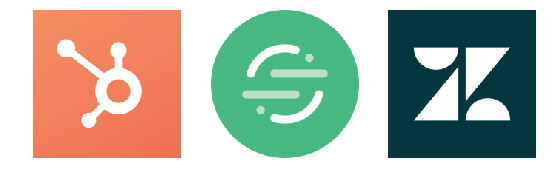

In [29]:
logo_domains = proc_domains[proc_domains["use_logo"] == 1].index

logo_images = [Image.open(lg_dir + f + ".png") for f in logo_domains]
show_images(logo_images)

That looks pretty good!

**2. Do our border/logo combinations look good?** 

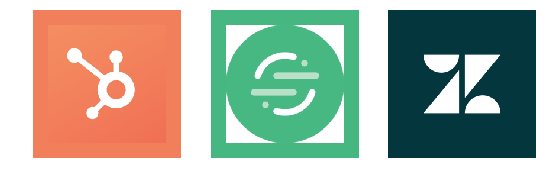

In [30]:
preview_images = [Image.open(pr_dir + f + ".png") for f in logo_domains]
show_images(preview_images)

It looks like our `find_primary_color` function correctly identified the primary color in Segment's logo as green, but because the actual edges of the logo are white, we should set our border to white as well. We can do this by changing the value of `border_color` to "#ffffff", or just leaving it blank.

In [31]:
proc_domains.loc["segment.com", "border_color"] = None

Note that we don't have to replace the image in our preview directory. Our script will use the `border_color` values in our `proc_domains` dataframe.

Finally, the HubSpot logo has a subtle gradient going on that slightly throws off our orange border - but in this case we're just going to leave it be.

**3. Do the company names look good?**

**4. Is *target* set to 0 for all accounts we don't want to target?**

In [32]:
proc_domains

,border_color,target,use_logo,use_name
domain,,,,
hubspot.com,#f27f5b,1,1,HubSpot
segment.com,None,1,1,Segment
zendesk.com,#03363d,1,1,Zendesk
crmcorgi.com,None,0,0,None


Our company names look good, and the only domain we don't want to target is the one we weren't able to get any information about, crmcorgi.com, which already has a `target` value of 0.

### Step seven: generate some images!

Let's get to the reason we're all here.

In [33]:
TEMPLATE_PATH = wk_dir + "/image-scaler-demo.png"
FONT_PATH = "/Users/ianchan/Library/Fonts/Graphik-Medium.otf"

In [34]:
from PIL import ImageDraw, ImageFont

In [35]:
def generate_images(df, template_path=TEMPLATE_PATH, font_path=FONT_PATH):
    font = ImageFont.truetype(font_path, 15)
    
    for idx, row in df.iterrows():
        domain = idx
        
        if row["target"] != 1:
            print("Skipped domain: {}".format(domain))
            continue
            
        name = row["use_name"]
        bg = Image.open(template_path)
        draw = ImageDraw.Draw(bg)
        
        draw.text((10, 44), "at {}".format(name), font=font)

        if row["use_logo"] == 1:
            border_color = hex_to_rgb(row["border_color"]) if row["border_color"] else (254, 254, 254)
            border_box = [(54, 148), (54 + 80, 148 + 80)]
            draw.ellipse(border_box, fill=border_color)
            
            logo_size = 58
            logo = Image.open(lg_dir + domain + ".png")
            logo = logo.resize((logo_size, logo_size))
            bg_width, bg_height = bg.size
            bg_offset_center = (bg_width / 2 - (logo_size / 2), 160)
            bg.paste(logo, bg_offset_center) 

        bg.save(im_dir + domain + ".png")

In [36]:
%time generate_images(proc_domains)

Skipped domain: crmcorgi.com
CPU times: user 108 ms, sys: 4.16 ms, total: 112 ms
Wall time: 148 ms


And our results:

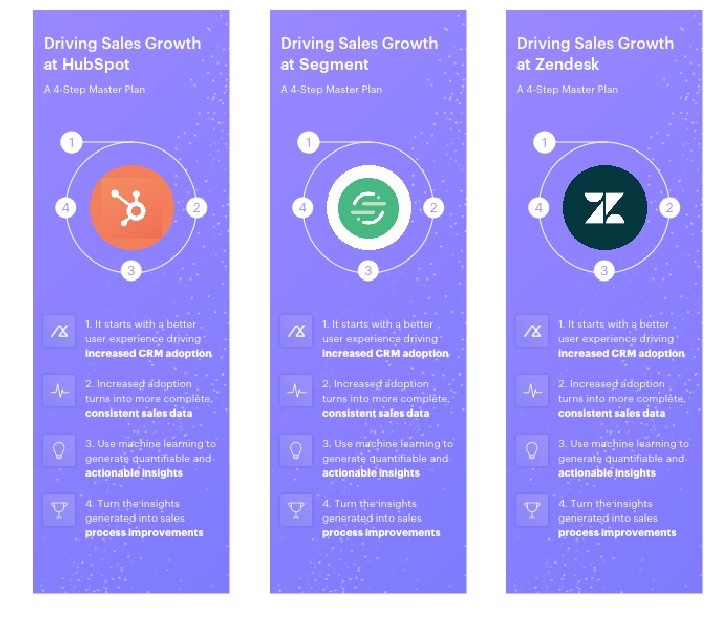

In [37]:
final_images = [Image.open(im_dir + f + ".png") for f in logo_domains]
show_images(final_images, figsize=(12, 12))